In [200]:
import sqlite3

In [201]:
import pandas as pd

In [202]:
import os

In [203]:
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv("access_logs.csv", parse_dates=["timestamp"])

In [205]:
df

,ip_address,timestamp,endpoint,response_code,user_agent
0,87.223.243.247,2025-08-05 12:27:50,/dashboard,200,curl/7.68.0
1,54.170.129.160,2025-08-05 12:25:07,/login,200,curl/7.68.0
2,100.42.125.134,2025-08-05 12:08:25,/search,404,Mozilla/5.0
3,170.130.138.144,2025-08-05 12:27:44,/settings,500,python-requests/2.25.1
4,64.35.194.81,2025-08-05 12:51:19,/search,200,Go-http-client/1.1
...,...,...,...,...,...
495,151.38.35.158,2025-08-05 12:33:11,/login,200,python-requests/2.25.1
496,209.152.25.107,2025-08-05 12:39:59,/home,200,Mozilla/5.0 (Linux; Android 10)
497,195.151.179.27,2025-08-05 12:51:38,/contact,200,Mozilla/5.0
498,96.42.128.160,2025-08-05 12:58:21,/login,403,Mozilla/5.0 (Linux; Android 10)


In [206]:
print(df.head())

        ip_address           timestamp    endpoint  response_code  \
0   87.223.243.247 2025-08-05 12:27:50  /dashboard            200   
1   54.170.129.160 2025-08-05 12:25:07      /login            200   
2   100.42.125.134 2025-08-05 12:08:25     /search            404   
3  170.130.138.144 2025-08-05 12:27:44   /settings            500   
4     64.35.194.81 2025-08-05 12:51:19     /search            200   

               user_agent  
0             curl/7.68.0  
1             curl/7.68.0  
2             Mozilla/5.0  
3  python-requests/2.25.1  
4      Go-http-client/1.1  


In [207]:
print(df.dtypes)

ip_address               object
timestamp        datetime64[ns]
endpoint                 object
response_code             int64
user_agent               object
dtype: object


In [208]:
# Convert timestamp to string just in case
df["timestamp"] = df["timestamp"].astype(str)

In [209]:
# Strip weird characters from user_agent
df["user_agent"] = df["user_agent"].str.encode('utf-8', 'ignore').str.decode('utf-8')

In [210]:
df["endpoint"] = df["endpoint"].astype(str)

In [211]:
df["ip_address"] = df["ip_address"].astype(str)

In [212]:
conn = sqlite3.connect("threat_logs.db")

In [213]:
# connecting to db

In [214]:
df.to_sql("access_logs", conn, if_exists="replace", index=False, dtype={
    "ip_address": "TEXT",
    "timestamp": "TEXT",
    "endpoint": "TEXT",
    "response_code": "INTEGER",
    "user_agent": "TEXT"
})

500

In [215]:
pd.read_sql_query("SELECT COUNT(*) FROM access_logs", conn)

,COUNT(*)
0,500


In [216]:
# checking to see data

In [217]:
query = """
SELECT ip_address, COUNT(*) AS admin_hit_count
FROM access_logs
WHERE endpoint = '/admin'
GROUP BY ip_address
ORDER BY admin_hit_count DESC;
"""

admin_abuse = pd.read_sql_query(query, conn)
admin_abuse

,ip_address,admin_hit_count
0,94.100.110.113,1
1,88.187.37.121,1
2,84.2.132.153,1
3,83.98.79.122,1
4,77.135.207.46,1
5,76.68.154.129,1
6,65.53.67.23,1
7,65.173.117.25,1
8,63.186.104.39,1
9,61.74.132.227,1


In [218]:
# checking to see all hits to /admin

In [219]:
query = """
SELECT ip_address, timestamp, user_agent
FROM access_logs
WHERE endpoint = '/admin'
GROUP BY ip_address
ORDER BY ip_address, timestamp;
"""

admin_logs = pd.read_sql_query(query, conn)
admin_logs.head(30)

,ip_address,timestamp,user_agent
0,109.160.116.178,2025-08-05 12:14:46,Mozilla/5.0 (Linux; Android 10)
1,109.233.86.83,2025-08-05 12:49:55,Mozilla/5.0 (Linux; Android 10)
2,11.83.1.62,2025-08-05 12:02:32,Mozilla/5.0
3,110.46.153.123,2025-08-05 12:14:40,curl/7.68.0
4,111.87.195.233,2025-08-05 12:32:15,Go-http-client/1.1
5,117.177.213.12,2025-08-05 12:18:32,python-requests/2.25.1
6,118.220.184.130,2025-08-05 12:49:50,Mozilla/5.0 (Linux; Android 10)
7,127.44.137.185,2025-08-05 12:31:49,Go-http-client/1.1
8,13.81.183.176,2025-08-05 12:41:01,Mozilla/5.0
9,132.68.153.183,2025-08-05 12:46:23,nmap


In [220]:
# pull in timestamp and user agent

In [221]:
query = """
SELECT ip_address, user_agent, COUNT(*) AS hit_count
FROM access_logs
WHERE user_agent LIKE '%curl%'
   OR user_agent LIKE '%python%'
   OR user_agent LIKE '%nmap%'
   OR user_agent LIKE '%Go-http-client%'
GROUP BY ip_address, user_agent
ORDER BY hit_count DESC;
"""

bot_traffic = pd.read_sql_query(query, conn)
bot_traffic

,ip_address,user_agent,hit_count
0,100.60.16.155,Go-http-client/1.1,1
1,101.180.23.34,python-requests/2.25.1,1
2,101.197.18.17,python-requests/2.25.1,1
3,101.233.150.110,nmap,1
4,102.197.5.173,python-requests/2.25.1,1
...,...,...,...
324,96.94.189.237,curl/7.68.0,1
325,97.150.40.17,Go-http-client/1.1,1
326,97.189.226.55,Go-http-client/1.1,1
327,97.206.0.167,python-requests/2.25.1,1


In [222]:
# Look for suspicious user_agents

In [223]:
query = """
SELECT ip_address, endpoint, user_agent, timestamp
FROM access_logs

WHERE ( user_agent LIKE '%curl%'
   OR user_agent LIKE '%python%'
   OR user_agent LIKE '%nmap%'
   OR user_agent LIKE '%Go-http-client%'
)
AND (
    endpoint = '/admin' OR
    endpoint = '/login' OR
    endpoint = '/settings'
)
ORDER BY ip_address, timestamp
"""

targeted_bot_activity = pd.read_sql_query(query, conn)
targeted_bot_activity

,ip_address,endpoint,user_agent,timestamp
0,101.197.18.17,/settings,python-requests/2.25.1,2025-08-05 12:30:06
1,102.197.5.173,/settings,python-requests/2.25.1,2025-08-05 12:56:57
2,103.30.157.142,/login,nmap,2025-08-05 12:15:52
3,104.70.217.100,/settings,nmap,2025-08-05 12:45:49
4,107.17.229.73,/settings,nmap,2025-08-05 12:01:36
...,...,...,...,...
107,95.162.242.83,/settings,Go-http-client/1.1,2025-08-05 12:50:43
108,95.9.37.68,/login,python-requests/2.25.1,2025-08-05 12:00:39
109,96.168.122.197,/login,python-requests/2.25.1,2025-08-05 12:44:48
110,97.150.40.17,/settings,Go-http-client/1.1,2025-08-05 12:11:43


In [224]:
# show IPs that used suspicious user_agents and accessed senstive endpoints

In [225]:
targeted_bot_activity.to_csv("flagged_bot_activity.csv", index=False)

In [226]:
# send out to csv

In [227]:
targeted_bot_activity["timestamp"] = pd.to_datetime(targeted_bot_activity["timestamp"])

In [228]:
# convert timestamp to datetime

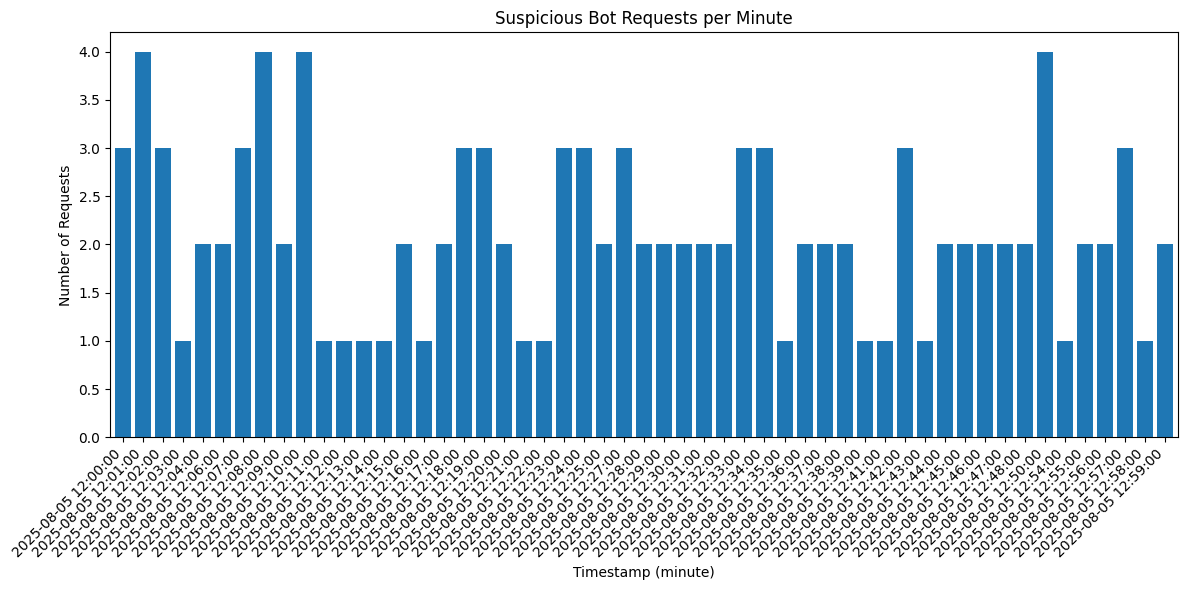

In [229]:
requests_per_minute = targeted_bot_activity.groupby(
    targeted_bot_activity["timestamp"].dt.floor("min")
).size()
    
# Plot
plt.figure(figsize=(12, 6))
requests_per_minute.plot(kind='bar', width=0.8)
plt.title("Suspicious Bot Requests per Minute")
plt.xlabel("Timestamp (minute)")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [230]:
# Number of suspicious requests over time (per min)

In [231]:
endpoint_time_series = targeted_bot_activity.groupby([
    targeted_bot_activity["timestamp"].dt.floor("min"),
    "endpoint"
]).size().unstack().fillna(0)

In [232]:
# Plot

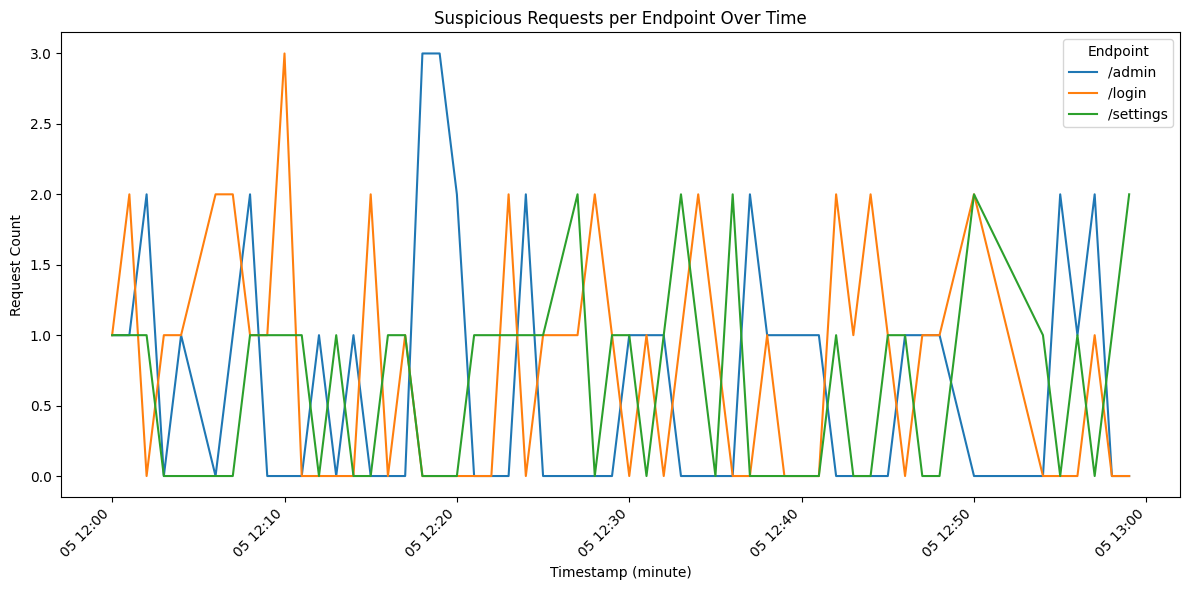

In [233]:
endpoint_time_series.plot(figsize=(12, 6))
plt.title("Suspicious Requests per Endpoint Over Time")
plt.xlabel("Timestamp (minute)")
plt.ylabel("Request Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Endpoint")
plt.tight_layout()
plt.show()